In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('bitcoinfinal.csv', header=None)
df.columns = ['months', 'price(USD)']
df = df.set_index('months')

In [5]:
df.head()

,price(USD)
months,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7


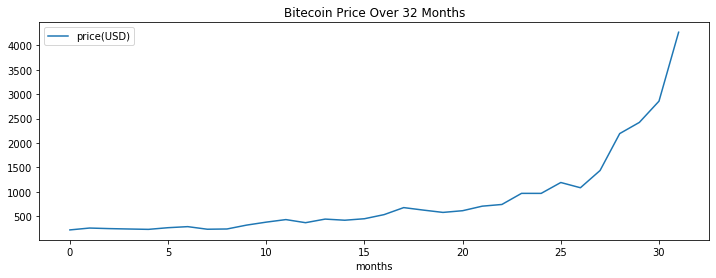

In [6]:
df.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitecoin Price Over 32 Months')
plt.show(block=False)

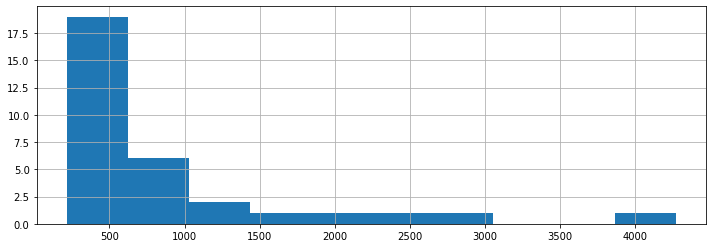

In [7]:
fig = df['price(USD)'].hist(figsize = (12,4))

# Build and evaluate time series forecast

## Split time series data into training and test set

In [8]:
train_len = 29
train = df[0:train_len] # first 29 months as training set
test = df[train_len:] # last 3 months as out-of-time test set

In [9]:
train

,price(USD)
months,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [10]:
test

,price(USD)
months,
29,2420.7
30,2856.0
31,4268.8


# Simple time series methods

In [11]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['price(USD)'][train_len-1]

In [12]:
y_hat_naive

,price(USD),naive_forecast
months,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


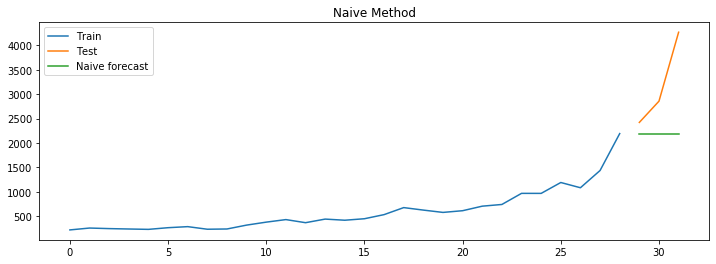

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_naive['naive_forecast'])/test['price(USD)'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


## Simple average method

In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['price(USD)'].mean()

In [16]:
y_hat_avg

,price(USD),avg_forecast
months,,
29,2420.7,595.751724
30,2856.0,595.751724
31,4268.8,595.751724


### Plot train, test and forecast

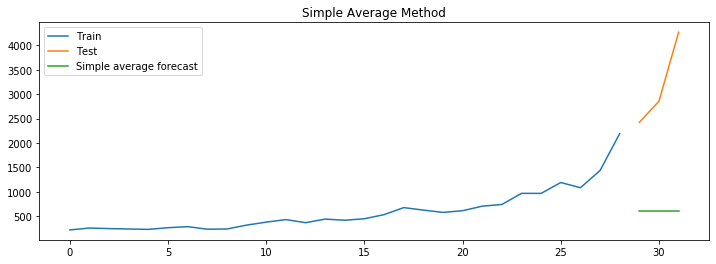

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [18]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_avg['avg_forecast'])/test['price(USD)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


## Simple moving average method

In [21]:
y_hat_sma = df.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = df['price(USD)'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [22]:
y_hat_sma

,price(USD),sma_forecast
months,,
0,217.4,NaN
1,255.7,NaN
2,244.3,239.133333
3,236.1,245.366667
4,228.7,236.366667
5,262.9,242.566667
6,284.5,258.700000
7,231.4,259.600000
8,236.5,250.800000


### Plot train, test and forecast

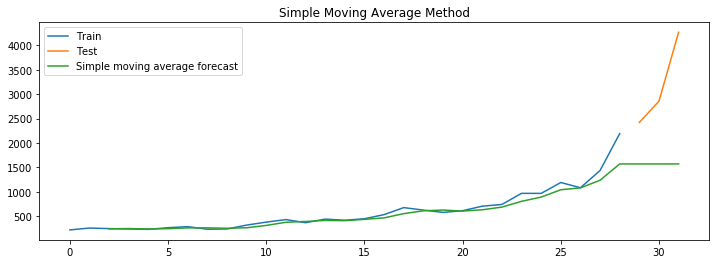

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [24]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_sma['sma_forecast'][train_len:])/test['price(USD)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1794.92,47.81


# Exponential smoothing methods

## Simple exponential smoothing

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['price(USD)'])
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 217.40890595697934, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

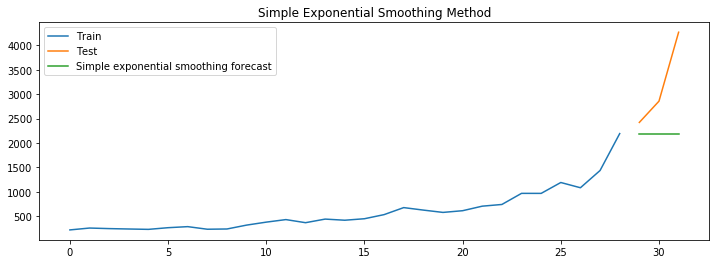

In [26]:
plt.figure(figsize=(12,4))
plt.plot(train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [27]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_ses['ses_forecast'])/test['price(USD)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12


## Holt's method with trend

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['price(USD)']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.4216654150289433, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.6845246688794, 'initial_slope': 13.715181780970754, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

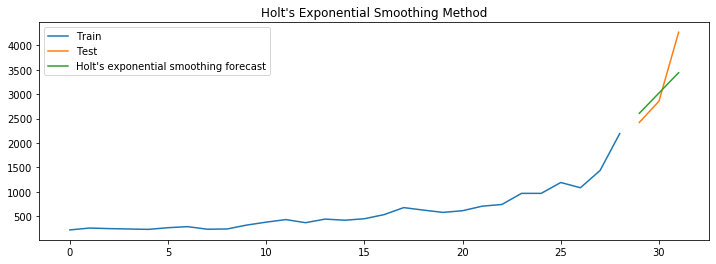

In [29]:
plt.figure(figsize=(12,4))
plt.plot( train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [30]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_holt['holt_forecast'])/test['price(USD)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01


## Holt Winters' additive method with trend and seasonality

In [31]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['price(USD)']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999, 'smoothing_slope': 0.42105263157894735, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 559.53, 'initial_slope': 1.1444444444444395, 'initial_seasons': array([-342.13, -303.83, -315.23]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

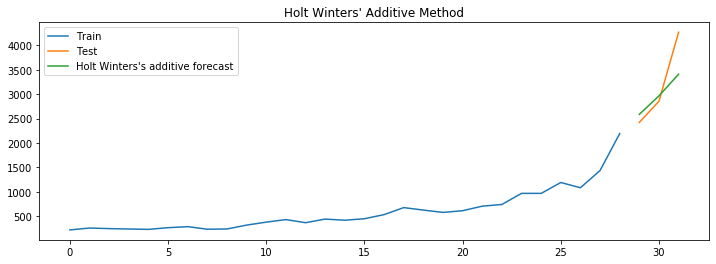

In [32]:
plt.figure(figsize=(12,4))
plt.plot( train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [33]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_hwa['hw_forecast'])/test['price(USD)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01
0,Holt Winters' additive method,509.49,10.26


## Holt Winter's multiplicative method with trend and seasonality

In [34]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['price(USD)']) ,seasonal_periods=3 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999, 'smoothing_slope': 0.3157894736842105, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 559.53, 'initial_slope': 1.1444444444444395, 'initial_seasons': array([0.38854038, 0.45699069, 0.43661645]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

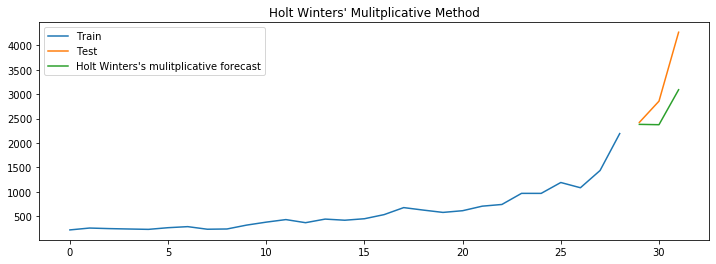

In [35]:
plt.figure(figsize=(12,4))
plt.plot( train['price(USD)'], label='Train')
plt.plot(test['price(USD)'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [36]:
rmse = np.sqrt(mean_squared_error(test['price(USD)'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price(USD)']-y_hat_hwm['hw_forecast'])/test['price(USD)'])*100,4)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.1200
0,Simple average method,2703.73,80.1900
0,Simple moving average forecast,1794.92,47.8100
0,Simple exponential smoothing forecast,1265.90,27.1200
0,Holt's exponential smoothing method,500.11,11.0100
0,Holt Winters' additive method,509.49,10.2600
0,Holt Winters' multiplicative method,735.31,15.3766
